In [66]:
import functions
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [67]:
fileName = 'W_A1_0_3.jpg'

In [68]:
img = cv2.imread(f'./sourceImages/{fileName}')

In [69]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
# hist, bin_edges = np.histogram(grayImg.flatten(), bins=range(256), density=True)
# newScale = 255 * np.cumsum(hist)
# newScale = np.concatenate([newScale, [newScale[-1]]], axis=0)
# newScale = newScale.astype(np.uint8)

# img = newScale[grayImg]

In [70]:
img_1 = grayImg

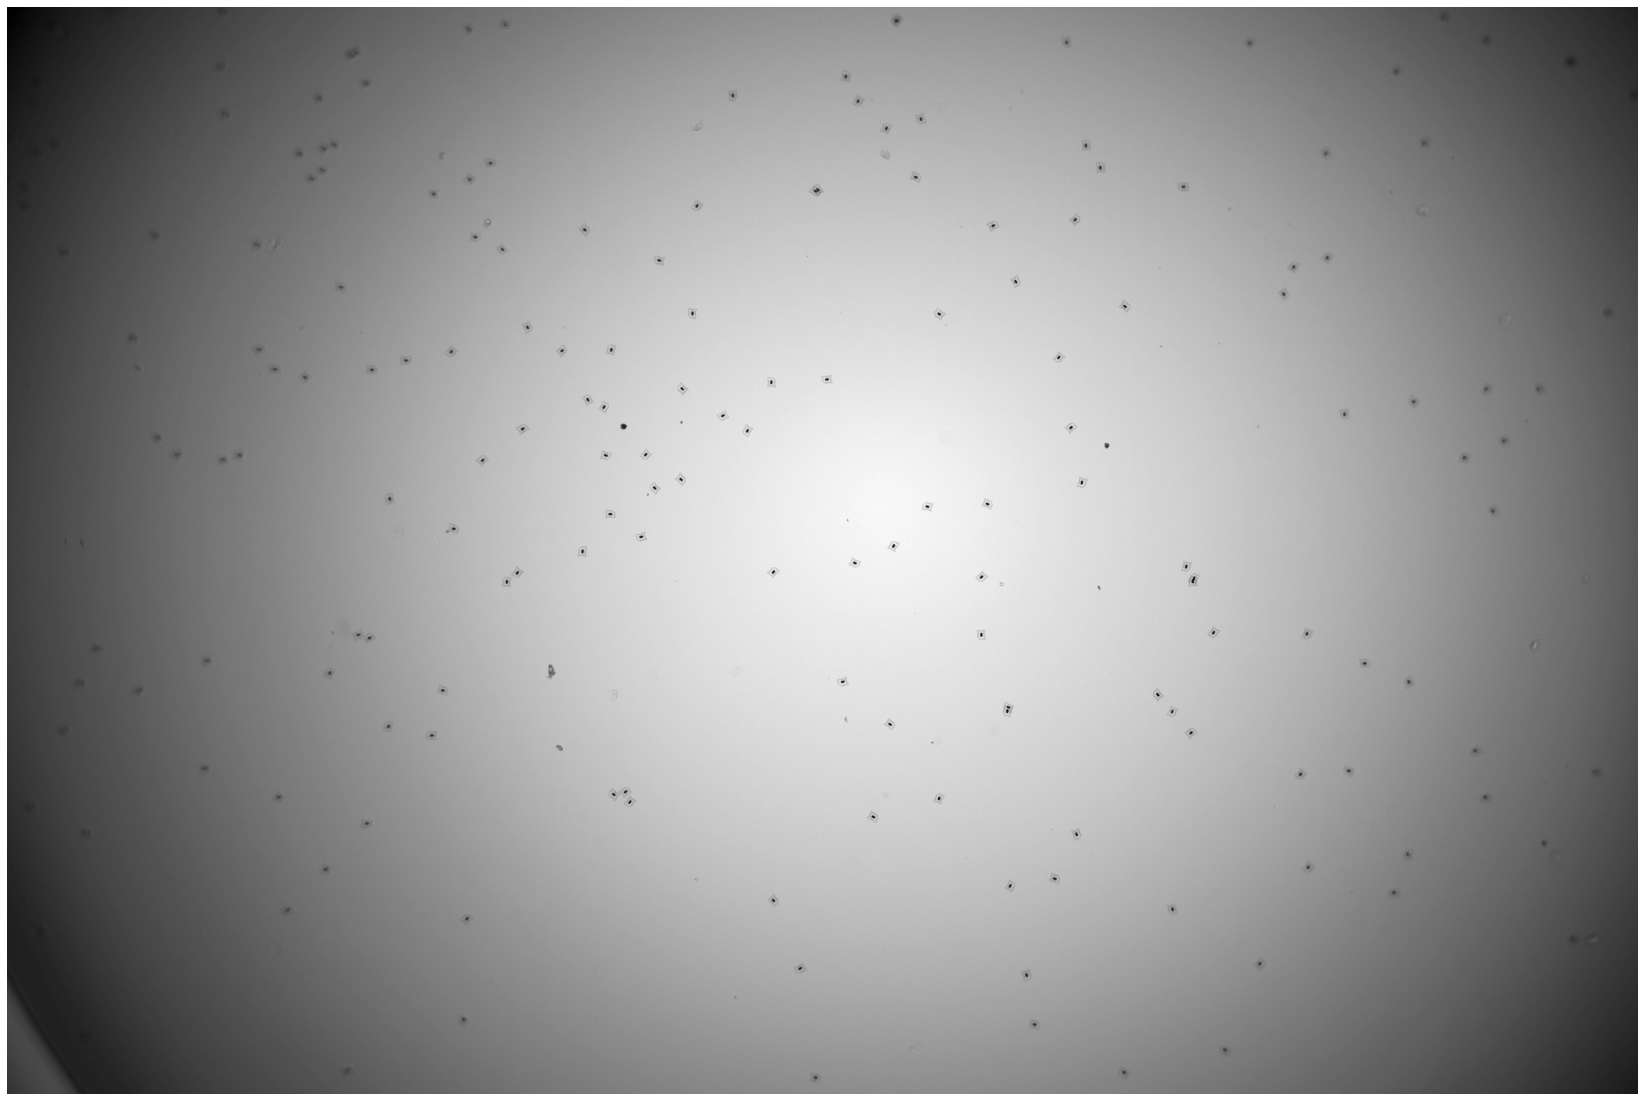

In [71]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_1, cmap='gray')

In [72]:
img_2 = functions.adaptiveThreshold(img_1, kernalSize = 51, offset=-3)

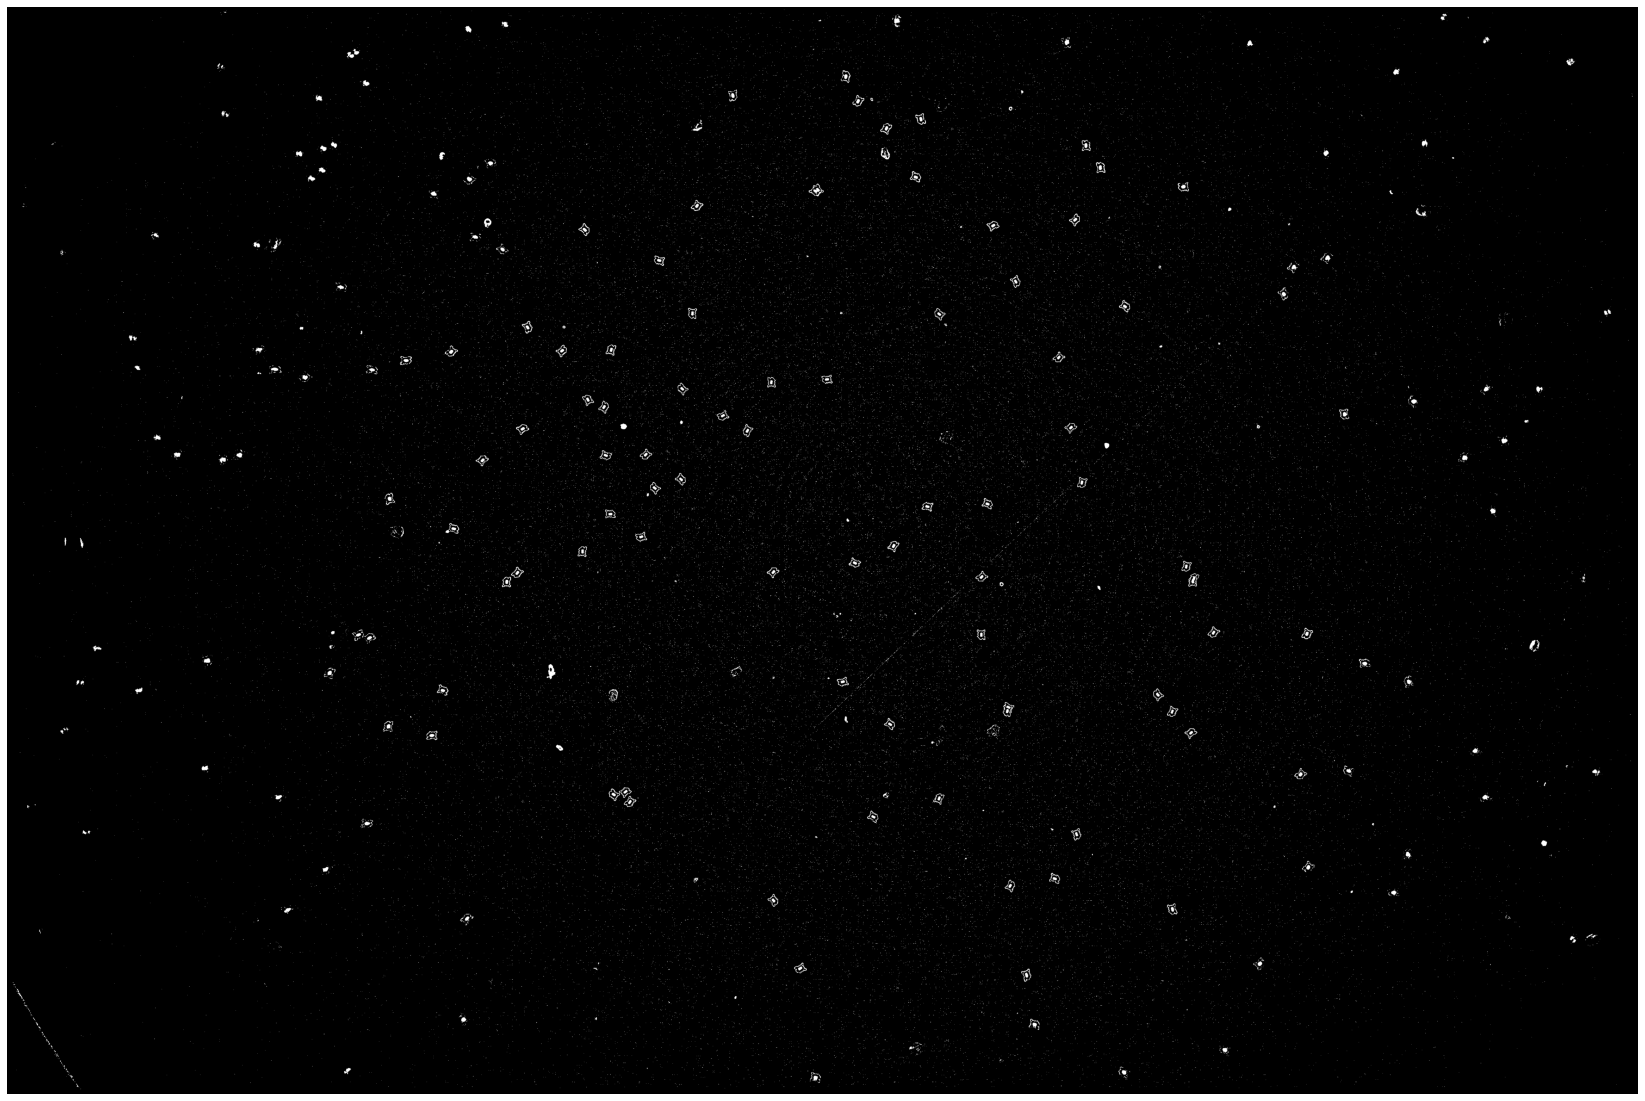

In [73]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_2, cmap='gray')

In [74]:
img_3 = cv2.erode(img_2, np.ones([5, 5]))

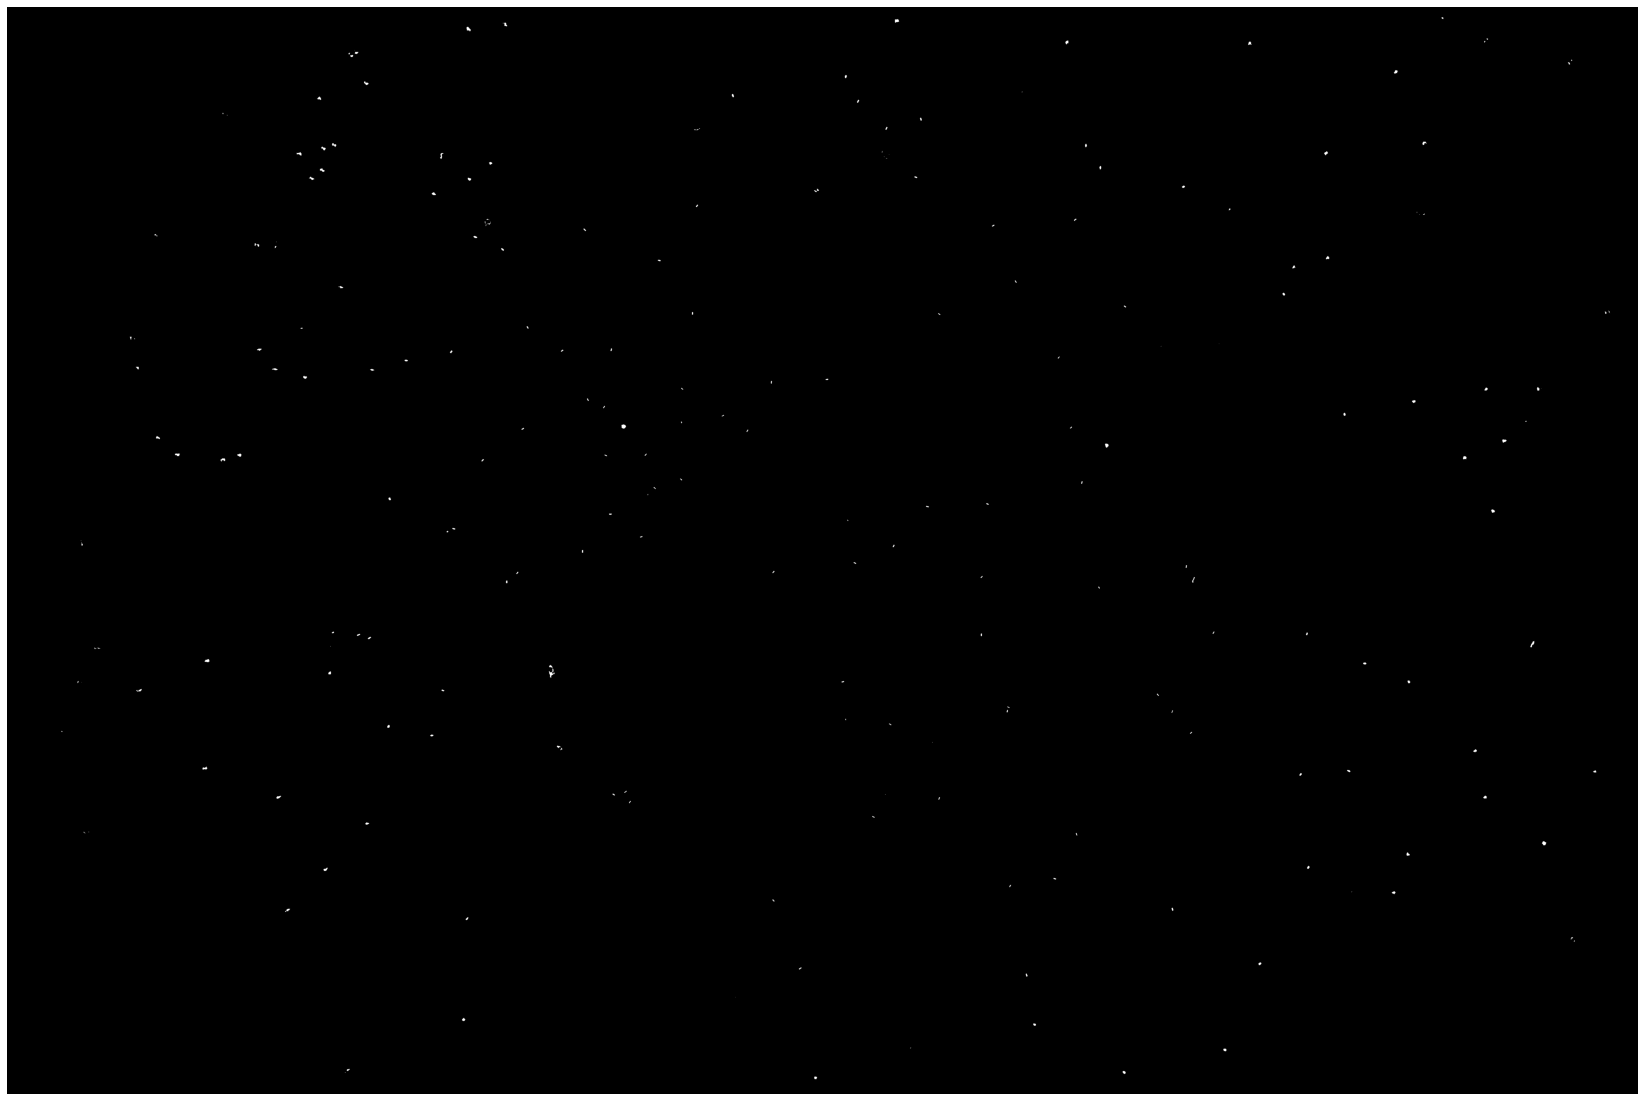

In [75]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_3, cmap='gray')

In [76]:
img_4 = cv2.dilate(img_3, np.ones([5, 5]), iterations=1)

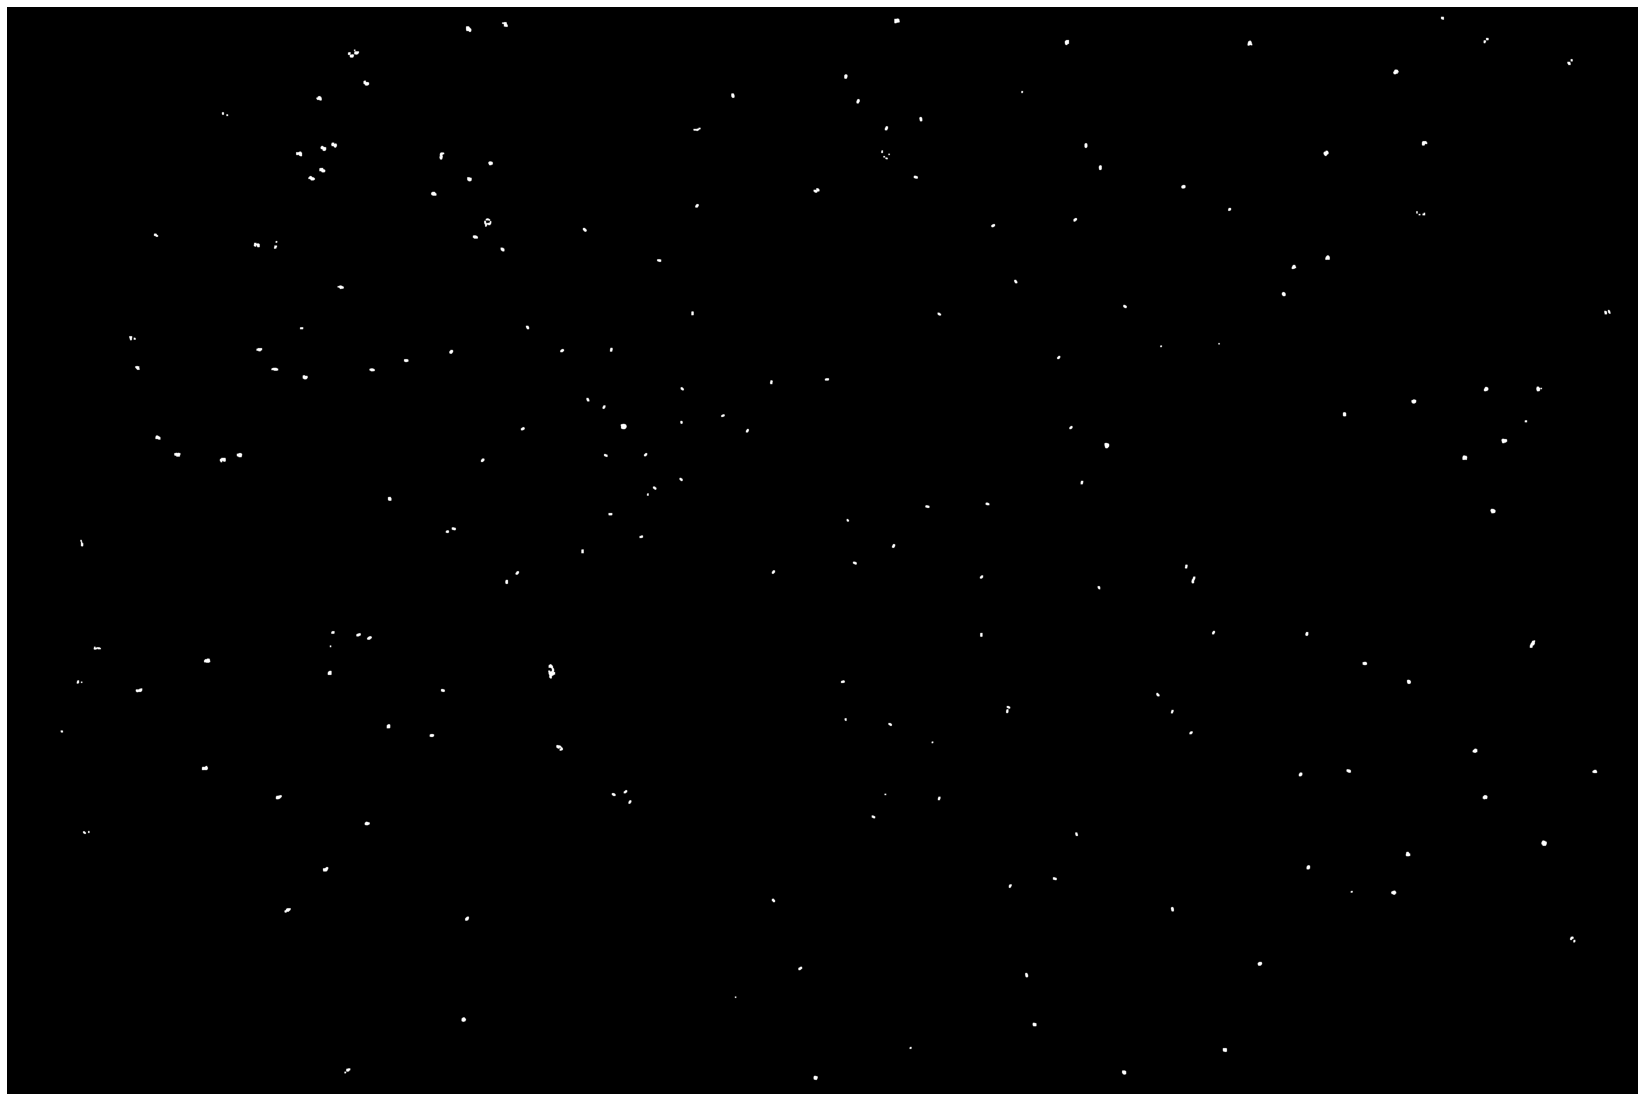

In [77]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_4, cmap='gray')

In [78]:
labels = functions.connectedComponents(img_4)

uni, cnt = np.unique(labels, return_counts=True)

In [79]:
img_5 = np.zeros(img_4.shape, dtype=np.uint8)
for u, c in zip(uni[1:], cnt[1:]):
    if c > 40:
        img_5[labels == u] = 1

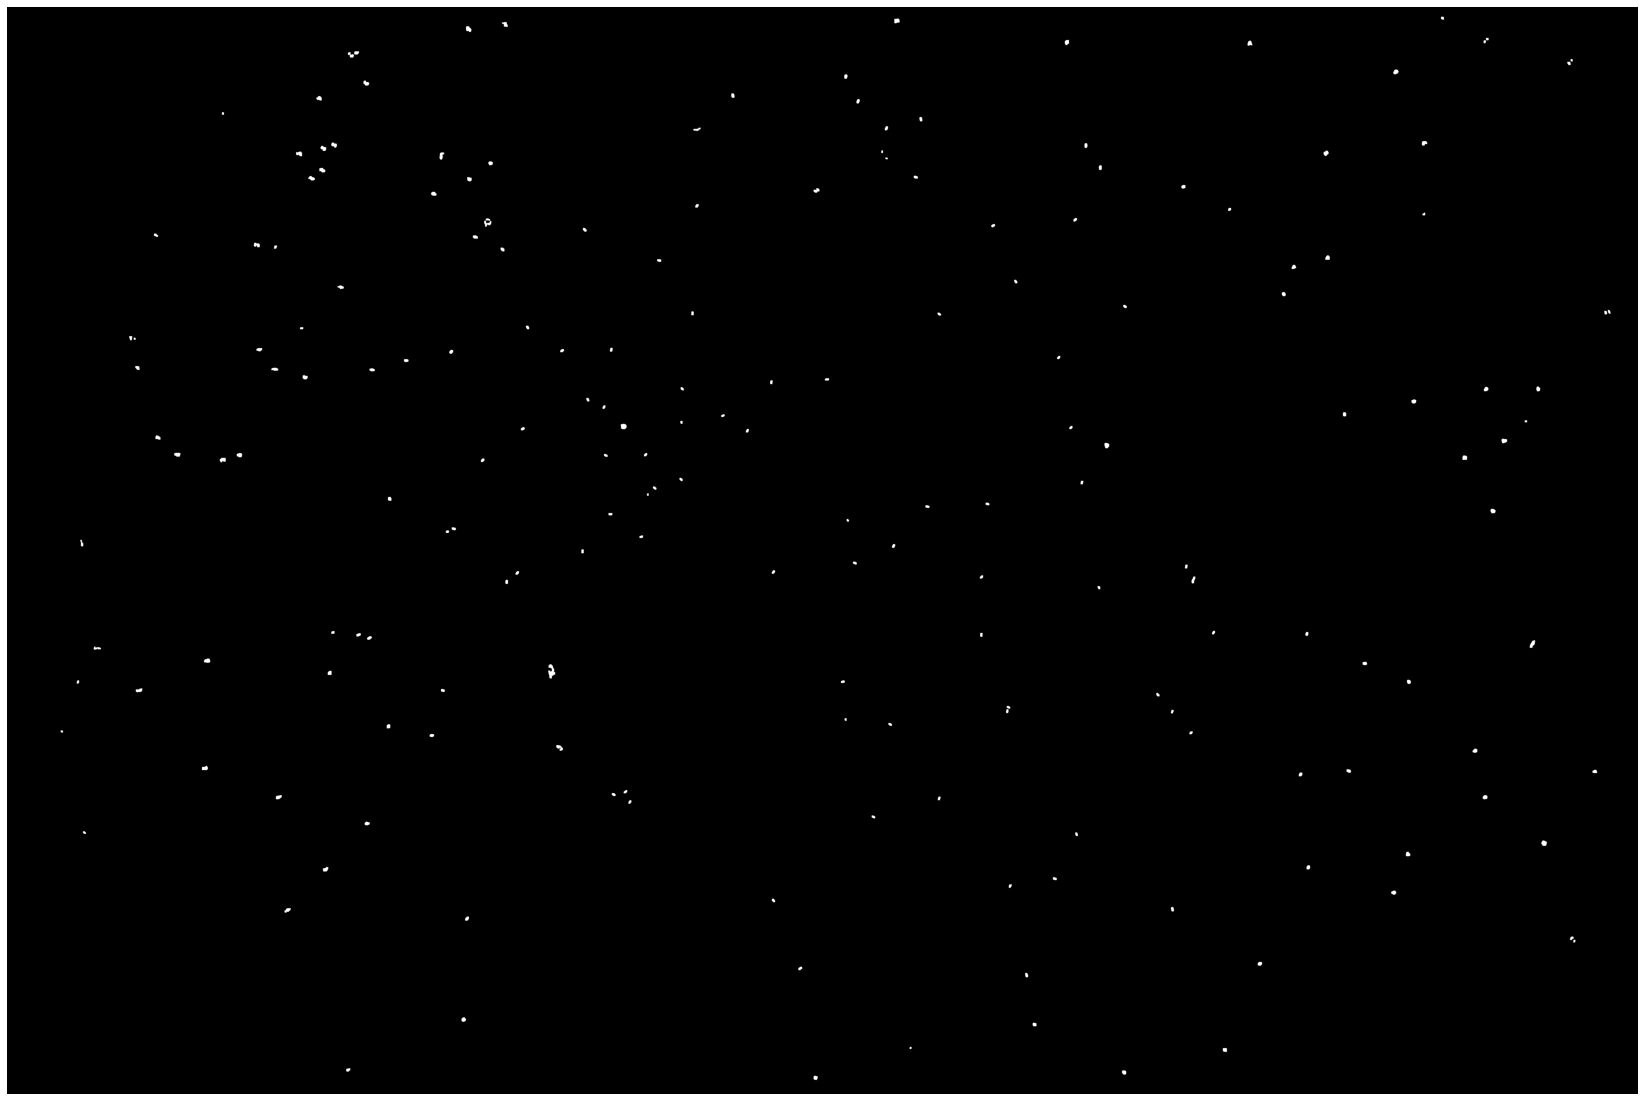

In [80]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_5, cmap='gray')

In [81]:
img_6 = cv2.cvtColor(np.logical_not(img_5).astype(np.uint8)*255, cv2.COLOR_GRAY2BGR)

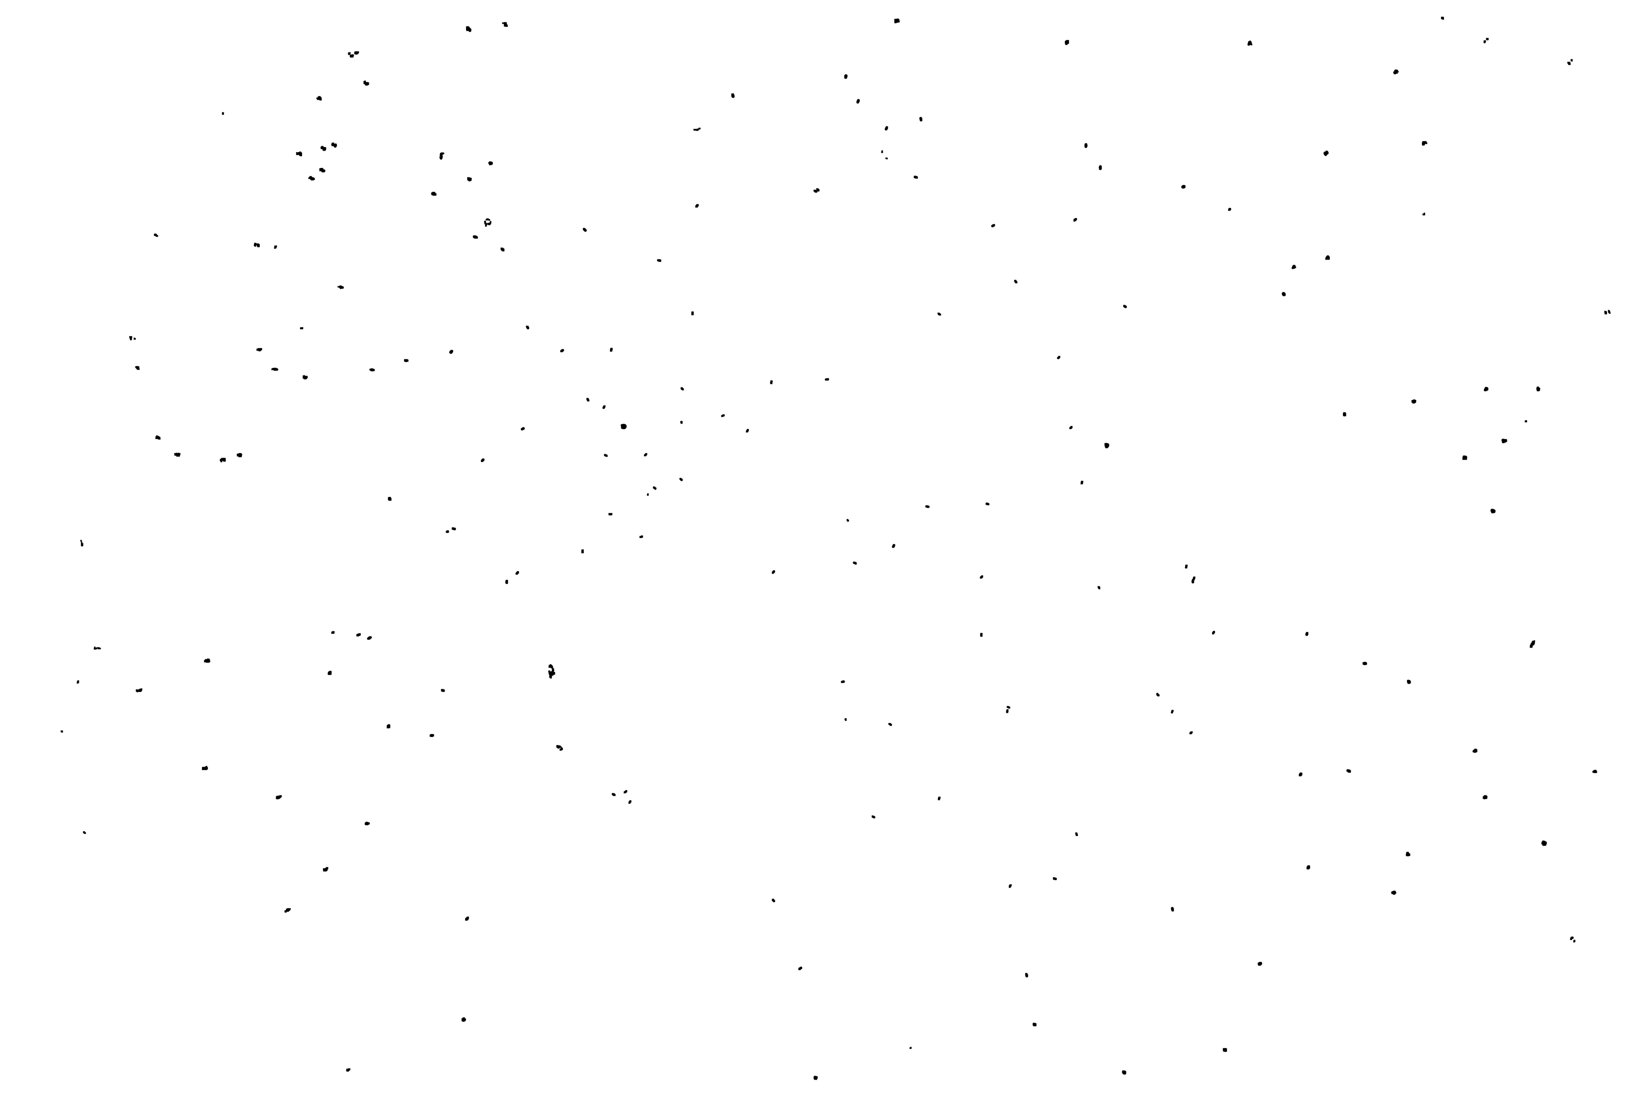

In [82]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_6, cmap='gray')

In [83]:
# cv2.imwrite(f'./resultImages/{fileName}', img_6)

In [84]:
sample = cv2.imread(f'./sampleImages/{os.path.splitext(fileName)[0]}_Binary-97.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
_, sample = cv2.threshold(sample, 100, 1, cv2.THRESH_BINARY_INV)

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(sample)
legal_conponent_count = ((stats[1:, 2] > 5) & (stats[1:, 2] < 14) & (stats[1:, 3] > 5) & (stats[1:, 3] < 14)).sum()
print('sample bead count =', legal_conponent_count)

sample bead count = 110


In [85]:
# 驗證
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img_5)
legal_conponent_count = ((stats[1:, 2] > 5) & (stats[1:, 2] < 14) & (stats[1:, 3] > 5) & (stats[1:, 3] < 14)).sum()
print('result bead count =', legal_conponent_count)

result bead count = 91
